In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from tools import get_data
import seaborn as sns
import numpy as np

# Test 01 de Selección de Variables

* Tamaño de Muestra: 300 millones de datos
* N° de Bandas: 150
* N° de ROIs: 6

Definiciones:
 * Rango en el nivel de la Calidad: 1 - 5, donde 1 es alta calidad y 5 es baja calidad.
    * ROI B: Zona totalmente blanca.
    * ROI A y F: Zona con partes cuarteadas blancas.
    * ROI D: Zona parcialmente clara.
    * ROI C: Zona parcialmente obscura.
    * ROI E: Zona obscura.
 * Para efectos de la presente experimentación, asumiremos que la calidad alta del alimento se determina por una zona totalmente blanca y la calidad baja se determina por una zona tptalmente obscura.

In [2]:
path = "D:\\Documentos\\LUIS AUGUSTO\\UPN 2019-2\\Tesis\\Data\\test_01\\rois\\"

### Carga de Datos y Filtrado Inicial para datos entre la longitud de onda 400 y la banda 1000 (Bandas 49 - 124)

#### ROI A

In [78]:
A = get_data(path + 'A.roi.txt')
A.shape

(33992, 76)

#### ROI B

In [39]:
B = get_data(path + 'B.roi.txt')
B.shape

(36544, 76)

#### ROI C

In [28]:
C = get_data(path + 'C.roi.txt')
C.shape

(8244, 76)

#### ROI D

In [30]:
D = get_data(path + 'D.roi.txt')
D.shape

(54925, 76)

#### ROI E

In [31]:
E = get_data(path + 'E.roi.txt')
E.shape

(17494, 76)

#### ROI F

In [32]:
F = get_data(path + 'F.roi.txt')
F.shape

(34617, 76)

# Selección de Variables

In [104]:
from sklearn.feature_selection import SelectKBest, chi2

In [127]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit_A = bestfeatures.fit_transform(A,np.ones(A.shape[0]) + 50)
fit_B = bestfeatures.fit_transform(B,np.ones(B.shape[0]))
fit_C = bestfeatures.fit_transform(C,np.ones(C.shape[0]) + 25)
fit_D = bestfeatures.fit_transform(D,np.ones(D.shape[0]) + 75)
fit_E = bestfeatures.fit_transform(E,np.ones(E.shape[0]) + 100)
fit_F = bestfeatures.fit_transform(F,np.ones(F.shape[0]) + 50)

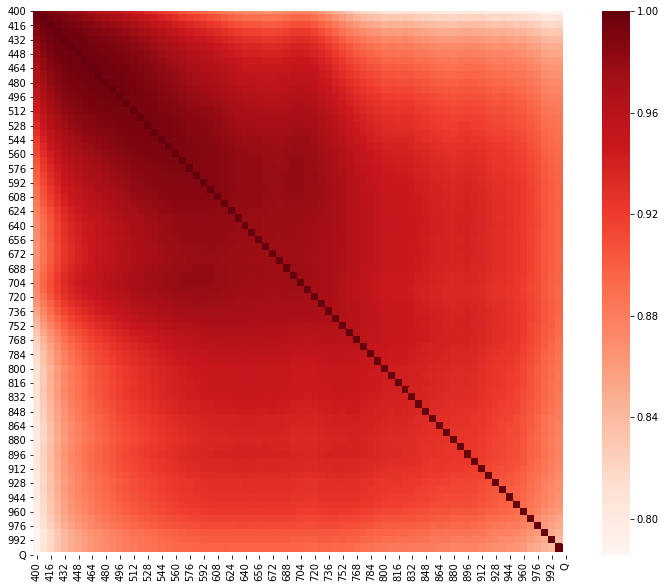

In [76]:
# Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()